## Joukowski Airfoil

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
alphad = 20 # angle of attack
m1oc = 0.2 # m1/c 
m2oc = 0.1 # m2/c
R = 1.

theta_str = str(alphad)+'°'
alpha = alphad*np.pi/180
c = R/np.sqrt(m2oc**2+(1+m1oc)**2)
c2 = c**2
chord = 4*c
m1 = m1oc*c
m2 = m2oc*c
s = -m1 + 1j*m2

In [3]:
# Circulation
Gamma = 4*np.pi*c*(1+m1oc)*np.sin(alpha+m2oc)
Cl = 2*Gamma/chord
Cl_str = str(Cl)
k = Gamma/2/np.pi

In [4]:
# Mesh grid
N = 100                            # no. of points in each direction
x_start, x_end = -5.0, 5.0        # boundaries for x-dir.
y_start, y_end = -5.0, 5.0        # boundaries for y-dir.
x_ar = np.linspace(x_start, x_end, N)    #
y_ar = np.linspace(y_start, y_end, N)
x, y = np.meshgrid(x_ar,y_ar)               # meshes grid

# Complex mesh plane
z = x+1j*y

# Exclusion of points inside circle
for i in range(N):
    for j in range(N):
        if abs(z[i,j])<= (R-5e-3):
            z[i,j] = complex(float('nan'),float('nan'))
#z = z[None,:,:]

In [5]:
# Aerodynamic potential 
f = np.exp(-1j*alpha)*(z-s) + (np.exp(1j*alpha)*R**2)/(z-s) + 1j*k*np.log(z-s)

# Joukowski transformation on grid
J = z+c2/z 

# Velocity field around circle
dfdz = np.exp(-1j*alpha) - (np.exp(1j*alpha)*R**2)/(z-s)**2 + 1j*k/(z-s)
u1 = dfdz.real
v1 = -dfdz.imag

# Velocity field around airfoil
W = dfdz/(1.-c2/z**2)
u = W.real
v = - W.imag

# Flow along contour of Circle and Joukowsky Airfoil
angle = np.linspace(0, 2*np.pi, N)
z_circle = R*(np.cos(angle)+1j*np.sin(angle)) + s
z_airfoil = z_circle+c2/z_circle
xc=z_airfoil.real
yc=z_airfoil.imag

# Circle
dfcdz = np.exp(-1j*alpha) - (np.exp(1j*alpha)*R**2)/(z_circle-s)**2 + 1j*k/(z_circle-s)
uc1 = dfcdz.real
vc1 = -dfcdz.imag

# Airfoil
Wa = dfcdz/(1.-c2/z_circle**2)
ua = Wa.real
va = - Wa.imag

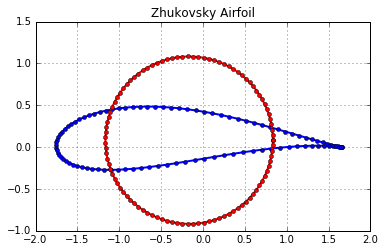

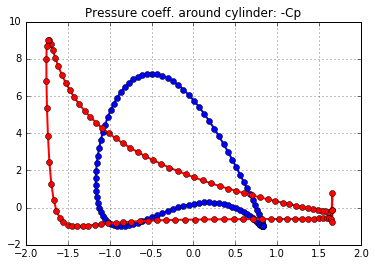

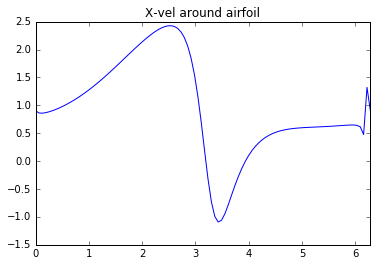

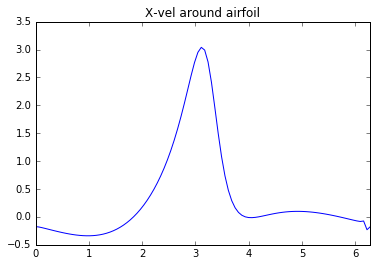

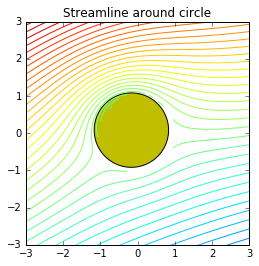

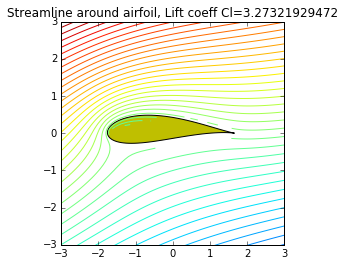

In [9]:
# Plotting
plt.figure()
plt.title('Zhukovsky Airfoil')
plt.plot(z_airfoil.real, z_airfoil.imag,
        '-bo', lw=2, ms=4)
plt.plot(z_circle.real, z_circle.imag,
        '-ro', lw=2, ms=4)
plt.axis('scaled')
plt.grid()

plt.figure()
plt.title('Pressure coeff. around cylinder: -Cp')
plt.plot(z_circle.real, -1.+(uc1**2+vc1**2),
        '-bo', lw=2, label='-Cp around cylinder')
plt.plot(z_airfoil.real, -1+(ua**2+va**2),
        '-ro', lw=2, label='-Cp, airfoil, AOA='+theta_str)         
plt.grid()

plt.figure()
plt.title('X-vel around airfoil')
plt.plot(angle, ua)
plt.grid
plt.xlim(0,2*np.pi)
plt.figure()
plt.title('X-vel around airfoil')
plt.plot(angle, va)
plt.grid
plt.xlim(0,2*np.pi)


plt.figure()
plt.title('Streamline around circle')
plt.contour(z.real, z.imag, f.imag, 
            list(np.linspace(-5,5,50)))
plt.fill(z_circle.real, z_circle.imag,'y')
plt.axis('scaled') # shall be before xlim ylim
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.figure()
plt.title('Streamline around airfoil, Lift coeff Cl='+Cl_str)
plt.contour(J.real, J.imag, f.imag, 
            list(np.linspace(-5,5,50)))
plt.fill(z_airfoil.real, z_airfoil.imag,'y')
plt.axis('scaled') # shall be before xlim ylim
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

In [15]:
speed= np.abs(W)

In [20]:
speed < 0.2

/Users/Alek/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [50]:
speed = np.sqrt(uc1**2 + vc1**2)

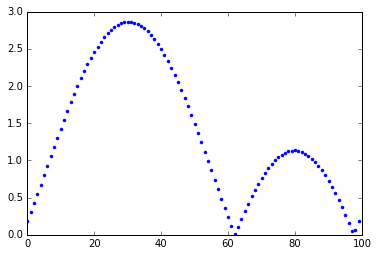

In [51]:
plt.plot(speed,'.')

In [52]:
np.argmin(speed[5:N-5])

57

/Users/Alek/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


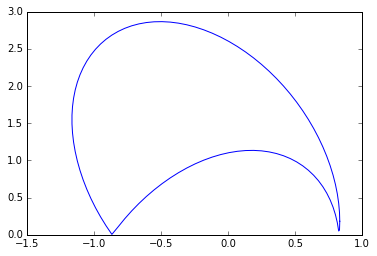

In [53]:
plt.plot(z_circle,speed)

In [73]:
t1 = np.array([])
t2 = np.copy(t1)
ind = np.argmin(speed[5:N-5])

#botside = np.append(np.abs(z_circle)[ind:],0)
#topside = np.append(np.abs(z_circle)[:ind], 0)
for i in range(speed[ind:].size): # bottom side
    Vi = speed[ind:][i]
    Di = botside[i+1]-botside[i]
    t1 = np.append(t1, Di/Vi)
for i in range(speed[:ind].size):
    Vi = speed[:ind][i]
    Di = topside[i+1]-topside[i]
    t2 = np.append(t2, Di/Vi)

In [74]:
T1 = np.sum(t1)
T2 = np.sum(t2)
print(T1)
print(T2)

-6.88415601255
-1.2996284113


In [66]:
botside

array([ 0.        ,  0.83803391,  0.84469152,  0.85205585,  0.86007948,
        0.86871233,  0.87790218,  0.88759534,  0.89773712,  0.90827236,
        0.91914585,  0.93030274,  0.94168883,  0.9532509 ,  0.96493691,
        0.9766962 ,  0.98847966,  1.00023982,  1.01193097,  1.02350919,
        1.03493242,  1.04616051,  1.05715515,  1.06787997,  1.07830047,
        1.088384  ,  1.09809981,  1.10741895,  1.11631428,  1.12476045,
        1.13273387,  1.14021266,  1.14717668,  1.15360744,  1.15948812,
        1.16480355,  1.16954016,  1.173686  ,  1.17723069,  1.18016543,
        1.18248298,  1.18417767,  1.18524534,  1.18568339,  1.18549077,
        1.18466793,  1.18321689,  1.18114118,  1.17844589,  1.17513764,
        1.17122464,  1.16671664,  1.16162498,  1.15596259,  1.14974402,
        1.14298545,  1.13570472,  1.12792131,  1.11965644,  1.11093302,
        1.10177571,  1.09221095,  1.08226699,  1.07197387,  1.0613635 ,
        1.05046966,  1.03932799,  1.02797603,  1.01645324,  1.00